In [1]:
% matplotlib inline
import numpy as np
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns

import json
from pandas.io.json import json_normalize

In [2]:
login = pd.read_json('/Users/harishprabhala/Downloads/ultimate_challenge/logins.json')
login.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
login.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.4 MB


In [4]:
login_dt = pd.DataFrame(index=login.login_time).sort_index()

In [5]:
login_dt.head()

""
login_time
1970-01-01 20:12:16
1970-01-01 20:13:18
1970-01-01 20:16:10
1970-01-01 20:16:36
1970-01-01 20:16:37


In [6]:
login_resample=login_dt.resample('15T')

In [7]:
login_resample.count()

""
login_time
1970-01-01 20:00:00
1970-01-01 20:15:00
1970-01-01 20:30:00
1970-01-01 20:45:00
1970-01-01 21:00:00
1970-01-01 21:15:00
1970-01-01 21:30:00
1970-01-01 21:45:00
1970-01-01 22:00:00


###  Part   1   ‑   Exploratory   data   analysis

In [8]:
series = pd.Series(login, index=login.login_time)

In [9]:
series_samp = series.resample('15T').count()

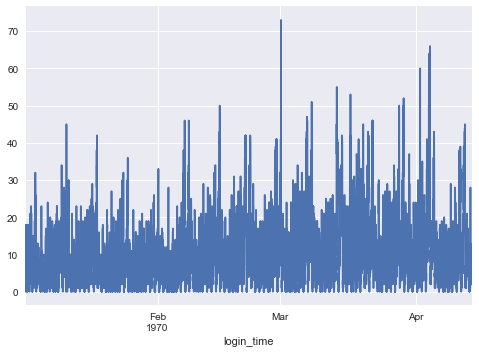

In [10]:
series_samp.plot()

In [11]:
series_df = pd.DataFrame(series_samp)

In [12]:
series_df.columns = ['count']

In [13]:
series_df.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [14]:
series_df['day']=series_df.index.day
series_df['hour']=series_df.index.hour
series_df['minute']=series_df.index.minute
series_df['weekday']=series_df.index.weekday
series_df['date']=series_df.index.date
series_df['time']=series_df.index.time
series_df['week']=series_df.index.week
series_df.head()

,count,day,hour,minute,weekday,date,time,week
login_time,,,,,,,,
1970-01-01 20:00:00,2,1,20,0,3,1970-01-01,20:00:00,1
1970-01-01 20:15:00,6,1,20,15,3,1970-01-01,20:15:00,1
1970-01-01 20:30:00,9,1,20,30,3,1970-01-01,20:30:00,1
1970-01-01 20:45:00,7,1,20,45,3,1970-01-01,20:45:00,1
1970-01-01 21:00:00,1,1,21,0,3,1970-01-01,21:00:00,1


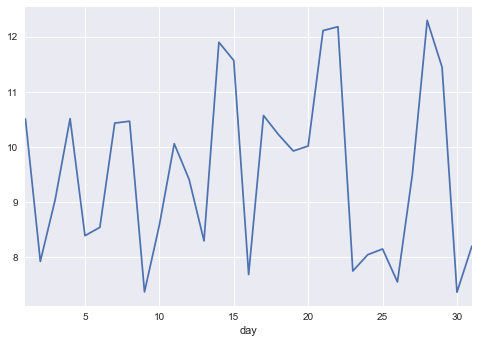

In [15]:
series_df.groupby('day')['count'].mean().plot()

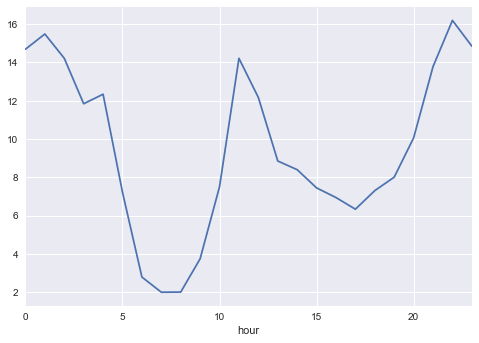

In [16]:
series_df.groupby('hour')['count'].mean().plot()

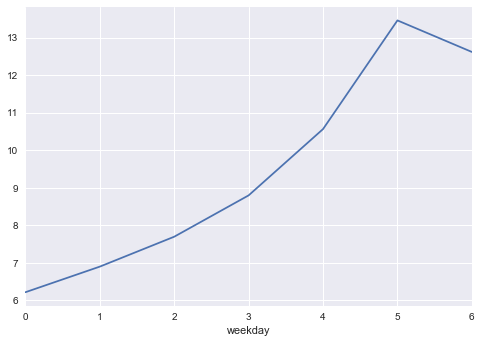

In [17]:
series_df.groupby('weekday')['count'].mean().plot()

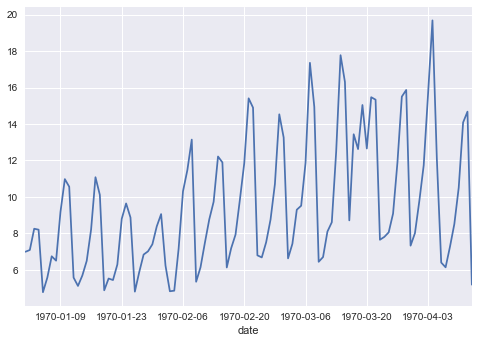

In [18]:
series_df.groupby('date')['count'].mean().plot()

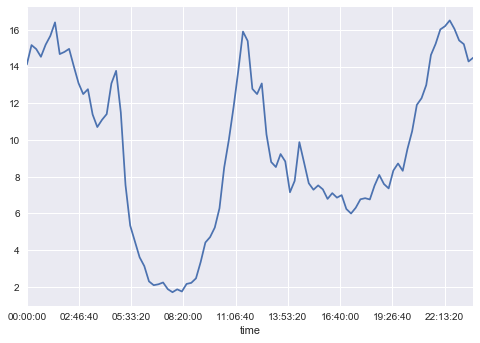

In [19]:
series_df.groupby('time')['count'].mean().plot()

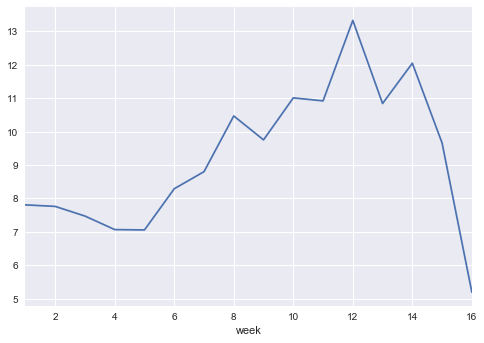

In [20]:
series_df.groupby('week')['count'].mean().plot()

##### If we look at the daily pattern, we can seethat people are majorly active at night from 10 pm to around 3am and morning between 9 am to noon. The demand is lowest between 4 am to 9 am. On a week basis, we can observe a gradual increase in demand as the week progresses and the demand is highest on the weekends.

### Part   2   ‑   Experiment   and   metrics  design 

#### 1. The key metric I would choose is the number of trips (have they gone up or not) and the distance of the trips (did they increase or not). These two metrics will help me in determining the effectiveness of the expt because increase in trips and distance will directly correspond to the increase in driver availability in the two cities

#### 2. I would do a randomized control trail with two groups; one getting reimbursed for the toll and the other group does not. After the end of a 3 month study period, I would look at the average distance and the no. of trips made in each group. Then I will conduct a test of significance (such as t-test) to see if the difference is significant or not (p 0.05).

### Part   3   ‑   Predictive   modeling

In [21]:
retained_users =pd.DataFrame(json.load((open('/Users/harishprabhala/Downloads/ultimate_challenge/ultimate_data_challenge.json'))))
retained_users.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [22]:
retained_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [23]:
np.isnan(retained_users.avg_rating_by_driver).value_counts()

False    49799
True       201
Name: avg_rating_by_driver, dtype: int64

In [24]:
retained_users['avg_rating_by_driver'] = retained_users['avg_rating_by_driver'].fillna(0)

In [25]:
np.isnan(retained_users.avg_rating_of_driver).value_counts()

False    41878
True      8122
Name: avg_rating_of_driver, dtype: int64

In [26]:
retained_users['avg_rating_of_driver'] = retained_users['avg_rating_of_driver'].fillna(0)

In [27]:
retained_users.last_trip_date.dtype, retained_users.signup_date.dtype

(dtype('O'), dtype('O'))

In [28]:
retained_users['last_trip_date'] = pd.to_datetime(retained_users['last_trip_date'])

In [32]:
retained_users['signup_date'] = pd.to_datetime(retained_users['signup_date'])

In [33]:
retained_users.last_trip_date.dtype

dtype('<M8[ns]')

In [34]:
len(retained_users)

50000

In [35]:
no_of_days_since_signup=(retained_users['last_trip_date']-retained_users['signup_date']).dt.days

In [36]:
retained_users.signup_date.sort_values().head()

4674    2014-01-01
7672    2014-01-01
1431    2014-01-01
15387   2014-01-01
17482   2014-01-01
Name: signup_date, dtype: datetime64[ns]

In [37]:
retained_users.last_trip_date.sort_values().tail()

45126   2014-07-01
38651   2014-07-01
14473   2014-07-01
22735   2014-07-01
45357   2014-07-01
Name: last_trip_date, dtype: datetime64[ns]

In [38]:
# retained users -> if no of days since signup is more than 5 months (151 days for the year 2014) and took the last 
# trip in the last month

In [39]:
print ('percentage of users retained = ',(len(retained_users[no_of_days_since_signup > 151])/len(retained_users))*100)

percentage of users retained =  23.388


In [40]:
retained_users['retained'] = no_of_days_since_signup.apply(lambda x: '1' if x>151 else '0')

In [41]:
retained_users.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,0
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0


In [42]:
retained_users.retained.value_counts()

0    38306
1    11694
Name: retained, dtype: int64

In [116]:
cont_features = retained_users[['avg_dist','avg_rating_by_driver','avg_rating_of_driver','avg_surge', 'weekday_pct',
                           'surge_pct','trips_in_first_30_days']]

In [44]:
retained_users.city.value_counts()

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64

In [45]:
retained_users.phone.value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

In [46]:
retained_users.ultimate_black_user.value_counts()

False    31146
True     18854
Name: ultimate_black_user, dtype: int64

In [47]:
labels = retained_users.retained

In [48]:
retained_users_copy = retained_users

In [49]:
retained_users_copy.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,0
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0


In [50]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
retained_users_copy['city_code'] = encoder.fit_transform(retained_users_copy['city'])

In [51]:
retained_users_copy[['city','city_code']].head(10)

,city,city_code
0,King's Landing,1
1,Astapor,0
2,Astapor,0
3,King's Landing,1
4,Winterfell,2
5,Winterfell,2
6,Astapor,0
7,Winterfell,2
8,Winterfell,2
9,Winterfell,2


In [52]:
retained_users_copy['black_user_code'] = encoder.fit_transform(retained_users_copy['ultimate_black_user'])

In [53]:
retained_users_copy['phone'] = retained_users_copy['phone'].astype(str)

In [58]:
retained_users_copy['phone_code'] = bin_encoder.fit_transform(retained_users_copy['phone'])

In [59]:
retained_users_copy.phone_code.value_counts()

0    34978
1    15022
Name: phone_code, dtype: int64

In [104]:
features = retained_users_copy[['avg_dist','avg_rating_of_driver','avg_surge', 'weekday_pct',
                           'surge_pct','trips_in_first_30_days','city_code','phone_code','black_user_code']]

In [61]:
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

/Users/harishprabhala/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [65]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [105]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25, random_state=5)

In [114]:
random=RandomForestClassifier(n_estimators=250,max_depth=12, class_weight='auto', random_state=5)
random.fit(X_train,y_train)
print ('Accuracy of test data: ',(accuracy_score(random.predict(X_test), y_test)))
print ('Accuracy of training data: ',(accuracy_score(random.predict(X_train), y_train)))
print("\n")
print ('Classification report summary of Logistic Regression')
print(classification_report(random.predict(X_test), y_test))

Accuracy of test data:  0.74584
Accuracy of training data:  0.807946666667


Classification report summary of Logistic Regression
             precision    recall  f1-score   support

          0       0.76      0.89      0.82      8141
          1       0.70      0.47      0.56      4359

avg / total       0.74      0.75      0.73     12500



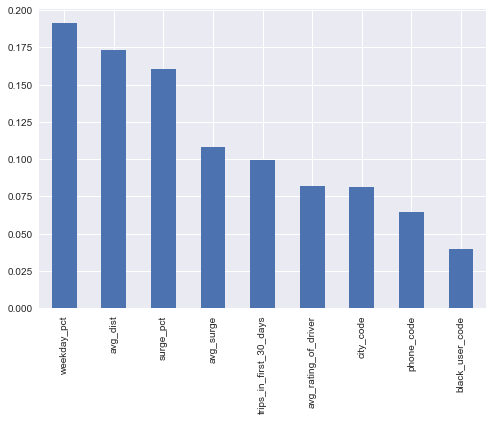

In [115]:
imp_feats=pd.Series(random.feature_importances_,index=features.columns)
imp_feats.sort_values(ascending=False).plot(kind='Bar')

In [120]:
retained_users_copy.avg_dist.describe()

count    50000.000000
mean         5.796827
std          5.707357
min          0.000000
25%          2.420000
50%          3.880000
75%          6.940000
max        160.960000
Name: avg_dist, dtype: float64

### According to the classifier, the most important features are weekly percent and average distance. So, if Uber can market more to the people who ride more on the weekdays and take shorter trips between 2 to 5 miles, we can increase the sales and ridership.